In [134]:
%matplotlib inline
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm, Normalize
import numpy as np

In [233]:
ref = Table.read('/home/aalvarez/Work/Projects/SourceXtractor-litmus/data/sim11/ref/sim11_r_01_reference.fits')
target = Table.read('/tmp/sourcex/x86_64-fc31-gcc93-dbg/test_vignette.py/output.fits')

In [234]:
len(ref), len(target)

(194, 239)

In [235]:
img = fits.open('/home/aalvarez/Work/Projects/SourceXtractor-litmus/data/sim11/img/sim11_r_01.fits.gz')[0]
bg = fits.open('/tmp/sourcex/x86_64-fc31-gcc93-dbg/test_vignette.py/check_background.fits')[0]
flux_scale = img.header['FLXSCALE']

In [236]:
img.data *= flux_scale
img.data -= bg.data

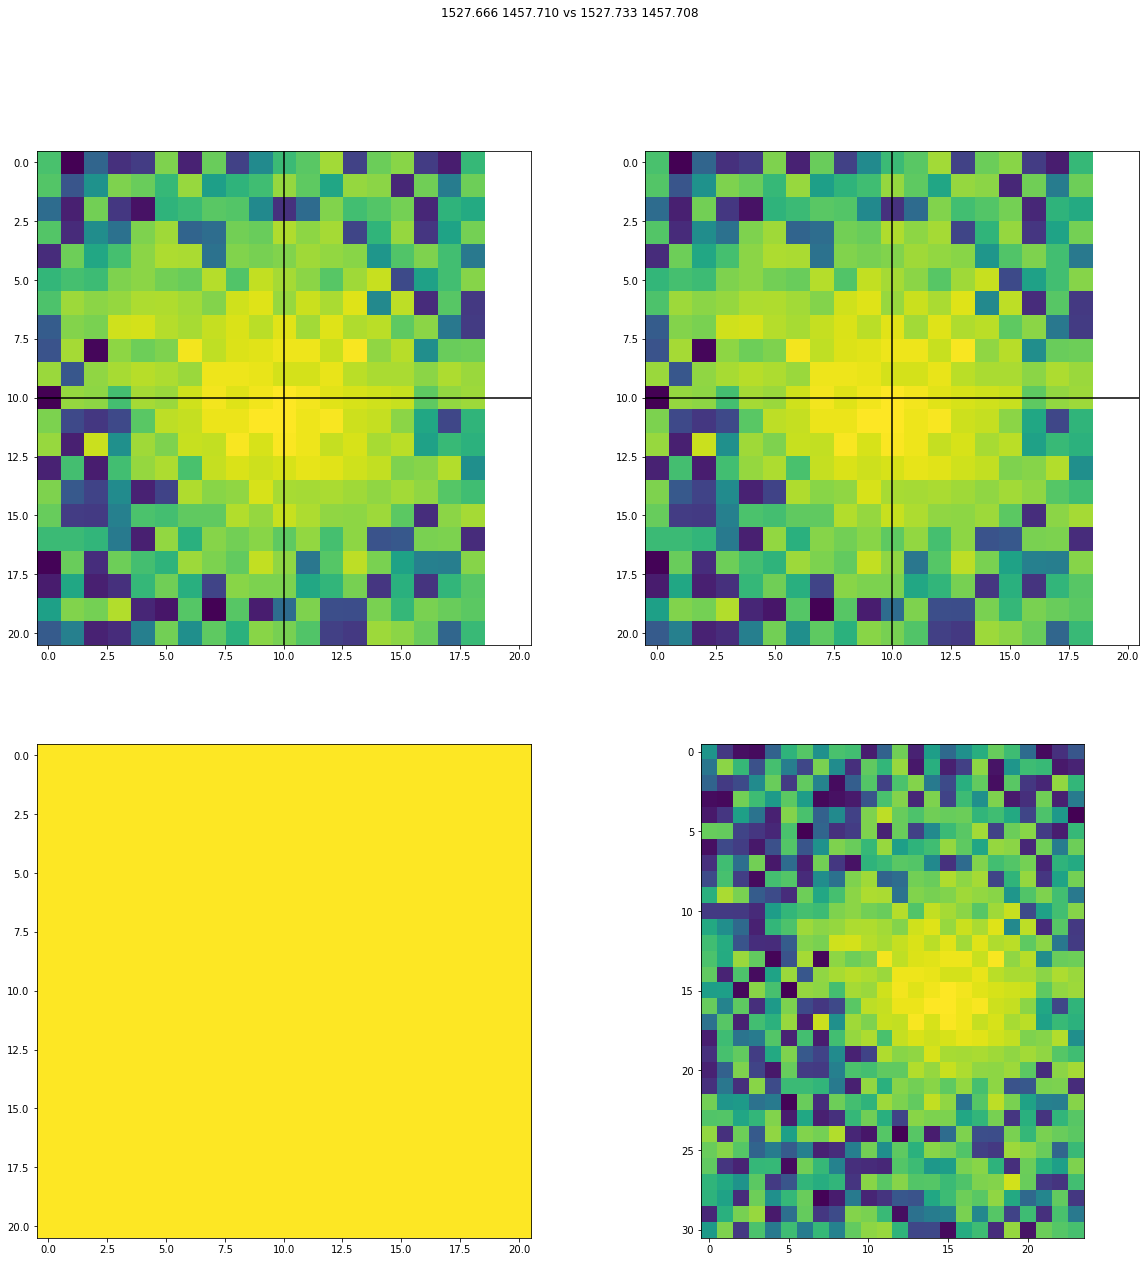

In [257]:
idx = 137

f = np.logical_and(target['pixel_centroid_x'] > ref[idx]['X_IMAGE']-1, target['pixel_centroid_x'] < ref[idx]['X_IMAGE']+1)
f2 = np.logical_and(target['pixel_centroid_y'] > ref[idx]['Y_IMAGE']-1, target['pixel_centroid_y'] < ref[idx]['Y_IMAGE']+1)
f = np.logical_and(f, f2)

assert(f.sum() == 1)
f = np.argmax(f)

vignette = target[f]['vignette']
vignet = ref[idx]['VIGNET']*flux_scale

x = int(np.round(t[idx]['X_IMAGE']))
y = int(np.round(t[idx]['Y_IMAGE']))
w = 31
cutout = img.data[y-(w//2)-1:y+(w//2),x-(w//2)-1:x+(w//2)]

# Apply nanmask
vignet[vignet<-1e29] = np.nan
vignette[vignette<-1e29] = np.nan

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
norm = SymLogNorm(10)
axes[0, 0].imshow(vignet, norm=norm)
axes[0, 0].axhline(21//2, 0, 21, c='black')
axes[0, 0].axvline(21//2, 0, 21, c='black')
axes[0, 1].imshow(vignette, norm=norm)
axes[0, 1].axhline(21//2, 0, 21, c='black')
axes[0, 1].axvline(21//2, 0, 21, c='black')
axes[1, 0].imshow(np.logical_or(np.isclose(vignet, vignette, atol=1e-3), np.isnan(vignet)), norm=Normalize(0, 1))
axes[1, 1].imshow(cutout, norm=norm)

plt.suptitle('{:.3f} {:.3f} vs {:.3f} {:.3f}'.format(ref[idx]['X_IMAGE'],ref[idx]['Y_IMAGE'],target[f]['pixel_centroid_x'],target[f]['pixel_centroid_y']))

plt.show()

In [230]:
for idx, r in enumerate(ref):
    f = np.logical_and(target['pixel_centroid_x'] > ref[idx]['X_IMAGE']-1, target['pixel_centroid_x'] < ref[idx]['X_IMAGE']+1)
    f2 = np.logical_and(target['pixel_centroid_y'] > ref[idx]['Y_IMAGE']-1, target['pixel_centroid_y'] < ref[idx]['Y_IMAGE']+1)
    f = np.logical_and(f, f2)
    if np.round(target[f]['pixel_centroid_x']) != np.round(r['X_IMAGE']):
        print(idx)

18
55
78
92
97
126
143
166
190


/home/aalvarez/miniconda3/envs/phz/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """


In [254]:
for idx, r in enumerate(ref):
    #if r['X_IMAGE'] < 21//2 or r['Y_IMAGE'] < 21//2 or 
    if r['X_IMAGE'] > img.data.shape[1]-21//2:
        print(idx)

0
23
80
126
137
148
179
